# 6.2 Exploring Relationships

## This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Correlations
#### 3. Scatterplots
#### 4. Pair Plot
#### 5. Categorical Plot
#### 6. Questions
#### 7. Hypotheses

## 1. Importing Visualization Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# define path
path = r'C:\Users\samir\OneDrive\Documents\CareerFoundry - Data Analytics\Data Immersion\Acheivement 6 - Advanced Analytics & Dashboard Design'

In [3]:
# import data
df = pd.read_csv(os.path.join(path, 'Data', 'timesdata_clean.csv'), encoding='latin-1')

In [4]:
# checking data
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,percent_international,female_male_ratio,percent_female,percent_male,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,20152,8.9,0.25,0,0.00,0.00,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,2243,6.9,0.27,33 : 67,0.33,0.67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,11074,9.0,0.33,37 : 63,0.37,0.63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,15596,7.8,0.22,1.79,0.42,0.58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,7929,8.4,0.27,1.91,0.45,0.55,2011


In [5]:
df.shape

(2603, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   world_rank             2603 non-null   object 
 1   university_name        2603 non-null   object 
 2   country                2603 non-null   object 
 3   teaching               2603 non-null   float64
 4   international          2594 non-null   float64
 5   research               2603 non-null   float64
 6   citations              2603 non-null   float64
 7   income                 2603 non-null   float64
 8   num_students           2603 non-null   int64  
 9   student_staff_ratio    2603 non-null   float64
 10  percent_international  2603 non-null   float64
 11  female_male_ratio      2603 non-null   object 
 12  percent_female         2603 non-null   float64
 13  percent_male           2603 non-null   object 
 14  year                   2603 non-null   int64  
dtypes: f

In [7]:
# changing percent male data type
df['percent_male'] = df['num_students'].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   world_rank             2603 non-null   object 
 1   university_name        2603 non-null   object 
 2   country                2603 non-null   object 
 3   teaching               2603 non-null   float64
 4   international          2594 non-null   float64
 5   research               2603 non-null   float64
 6   citations              2603 non-null   float64
 7   income                 2603 non-null   float64
 8   num_students           2603 non-null   int64  
 9   student_staff_ratio    2603 non-null   float64
 10  percent_international  2603 non-null   float64
 11  female_male_ratio      2603 non-null   object 
 12  percent_female         2603 non-null   float64
 13  percent_male           2603 non-null   float64
 14  year                   2603 non-null   int64  
dtypes: f

## 2. Correlations

In [11]:
# creating a subset excluding object columns
sub = df[['teaching', 'international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'percent_international']]

In [12]:
sub.corr()

,teaching,international,research,citations,income,num_students,student_staff_ratio,percent_international
teaching,1.000000,0.137834,0.913120,0.503867,0.179760,0.043559,-0.270348,0.273349
international,0.137834,1.000000,0.251146,0.325030,0.076407,-0.141652,0.060716,0.791630
research,0.913120,0.251146,1.000000,0.525264,0.256890,0.065745,-0.182574,0.334674
citations,0.503867,0.325030,0.525264,1.000000,-0.004042,-0.071660,-0.129201,0.309218
income,0.179760,0.076407,0.256890,-0.004042,1.000000,-0.034921,0.026740,0.064428
num_students,0.043559,-0.141652,0.065745,-0.071660,-0.034921,1.000000,0.373442,-0.126749
student_staff_ratio,-0.270348,0.060716,-0.182574,-0.129201,0.026740,0.373442,1.000000,-0.026489
percent_international,0.273349,0.791630,0.334674,0.309218,0.064428,-0.126749,-0.026489,1.000000


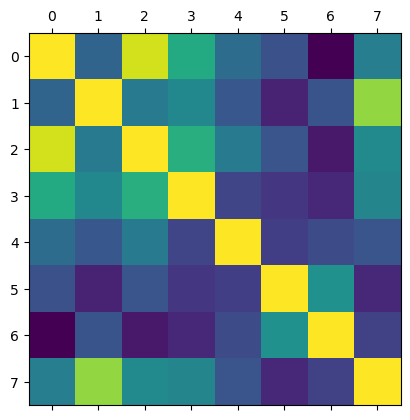

In [13]:
# correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

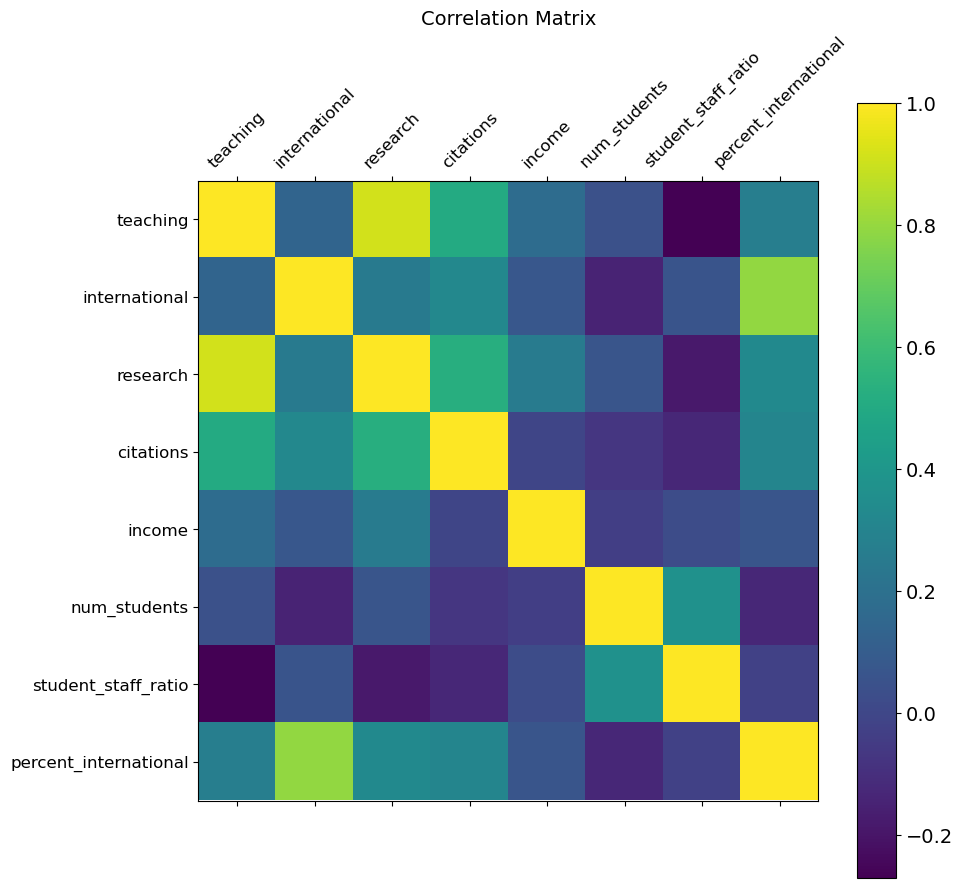

In [14]:
# adding labels, a legend, and changing the size
f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation = 45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

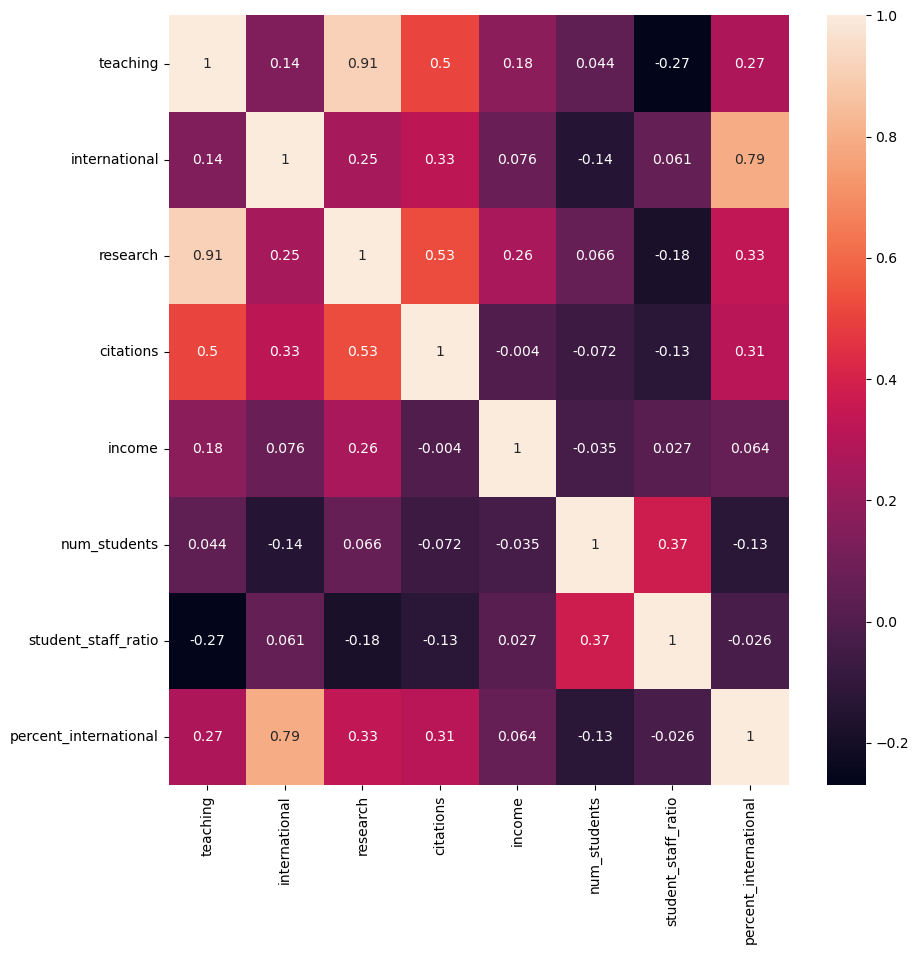

In [15]:
# correlation heatmap using seaborn
f,ax = plt.subplots(figsize=(10,10))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### There are multiple relationships shown on the heatmap that represent strong positive relationships. One of those relationships are between a universities teaching score and its research score with a value of 0.91. Another strong relationship is the percentage of international students and the score a university recieves from the international community. I did notice that there is a perfect score for the relationship between the percentage of male students and the number of students which seems to be a mistake with the data.

## 3. Scatterplot

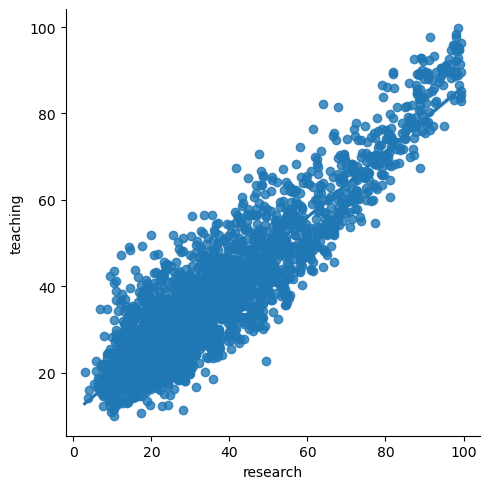

In [19]:
# scatterplot for research and citation variables
sns.lmplot(x = 'research', y = 'teaching', data = df)

#### This outcome was to be expected. When analysing the correlation heat map these two variables were already shown to have a strong positive relationship of .91 and the scatterplot reitereates this point visually.

## 4. Pair Plot

In [16]:
# creating second subset with less columns for the pair plots
sub_2 = sub[['teaching', 'research', 'student_staff_ratio', 'international', 'num_students']]

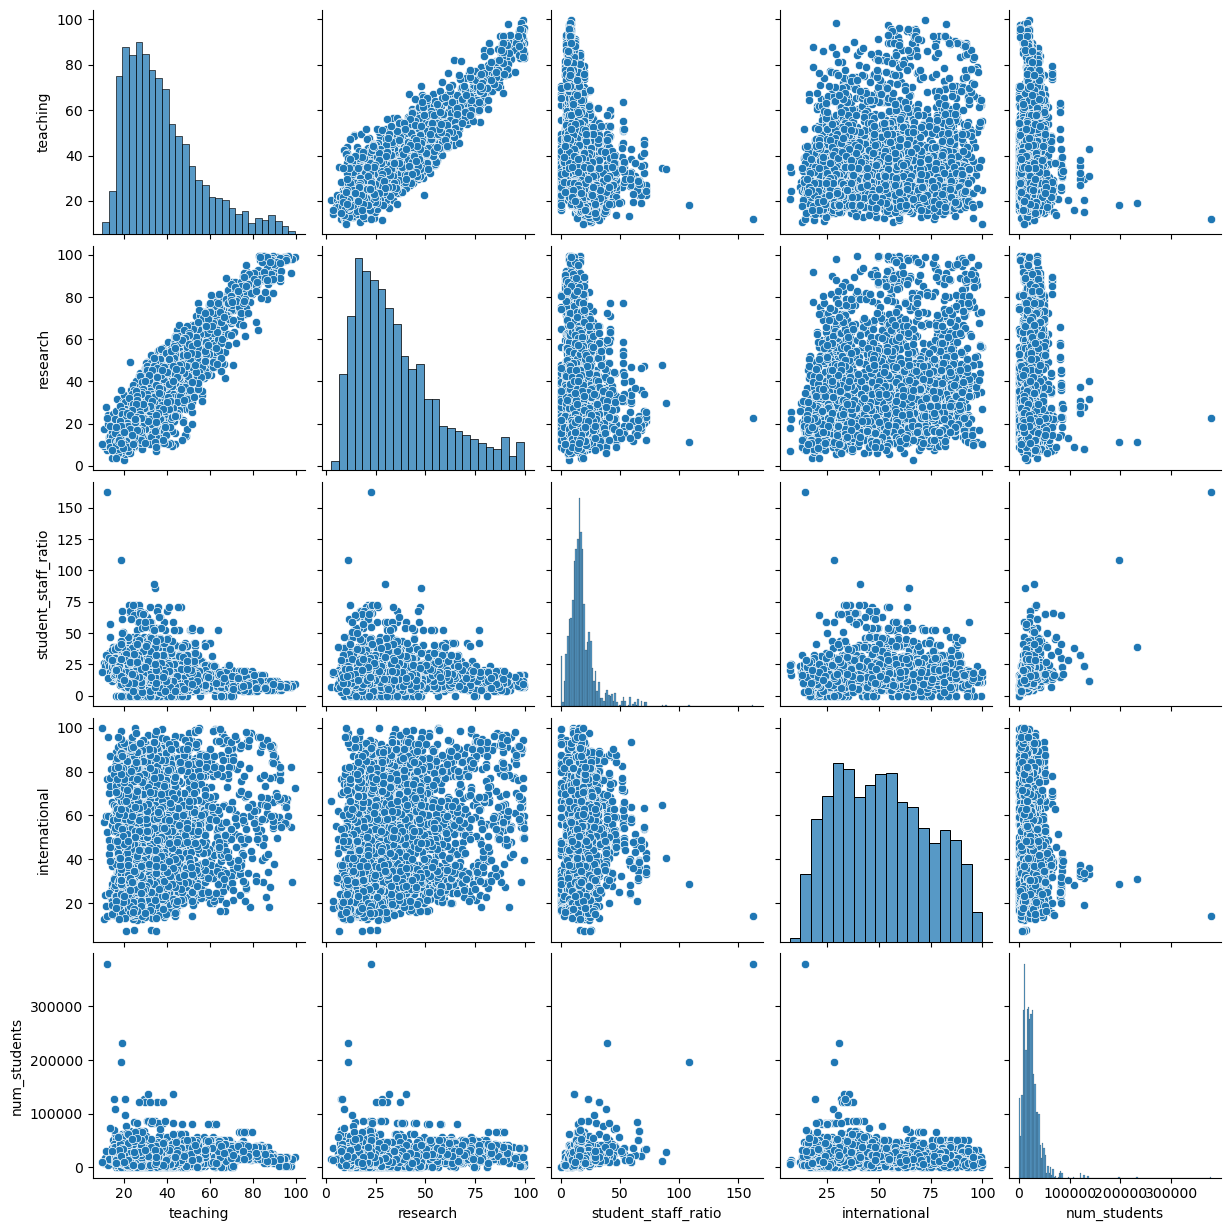

In [17]:
# pair plot 

g = sns.pairplot(sub_2)

#### The distributions shown in the various graphs were as expected. There are positive correlations with the teaching and income variables, and between research and income.

## 5. Categorical Plot

<AxesSubplot:xlabel='research', ylabel='Count'>

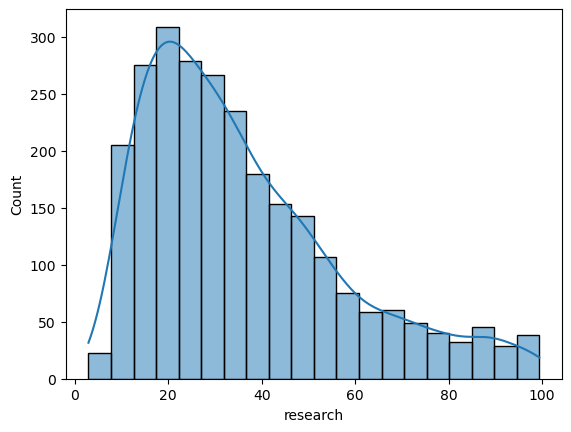

In [22]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['research'], bins = 20, kde = True)

In [23]:
# creating research score categories
df.loc[df['research'] < 20, 'research_score'] = 'Low score'
df.loc[(df['research'] >= 20) & (df['research'] < 60), 'research_score'] = 'Middle score'
df.loc[df['research'] >= 60, 'research_score'] = 'High score'

In [24]:
# check values
df['research_score'].value_counts(dropna = False)

Middle score    1572
Low score        671
High score       360
Name: research_score, dtype: int64

In [25]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'num_students',
       'student_staff_ratio', 'percent_international', 'female_male_ratio',
       'percent_female', 'percent_male', 'year', 'research_score'],
      dtype='object')

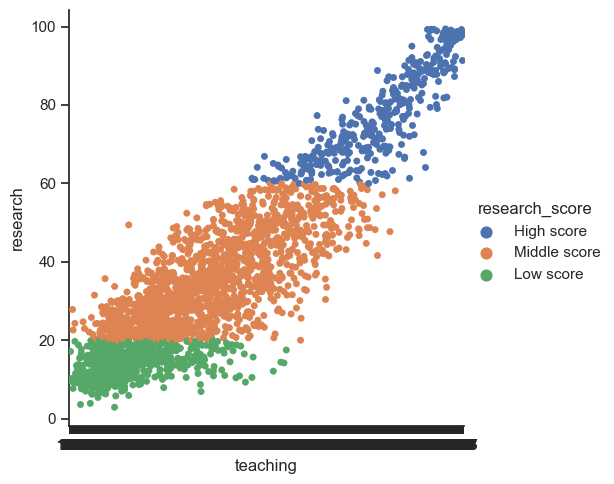

In [26]:
# create a categorical plot in seaborn using the research score created above

sns.set(style="ticks")
g = sns.catplot(x="teaching", y="research", hue="research_score", data=df)

## 6. Questions

### What is the relationship between international outlook score and the percentage of international students at a university?
#### there is a positive relationship between international outlook score and the percentage of international students. Universities with a higher international outlook score tend to have a higher percentage of international students.

### Does the research score impact a University's teaching score?
#### Yes, based on the strong correlation between the research and teaching score, a University's research score has a direct and strong impact on the teaching score.

### The other quesitons to explore refer to the categorical variables are not included in this analysis.

##  7. Hypothesis

#### If a university has a high research score, then it will also have a high teaching score.
#### If a university has a low teaching score, then it will also have a low citation score.